In [7]:
path_ball = r"H:\2020_07_07_TS\*.wav"
# filename = r"\S4A02746_20000104_124448.wav"
# file = path + filename
from glob import glob 

In [8]:
filelist_ball = glob(path_ball)

In [9]:
# from scipy.io import wavfile (do not support 24bits depth)
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib notebook

In [14]:
class SL():
    def __init__(self, file):
        self.file = file
        self.bits = 24
        self.range = 2
        title = self.file.split('\\')[-1].split('.')[0].split('_')
        self.plot_title = title[1] + "_" + title[2]
        self.freq = title[2]
        print("title: {}".format(self.plot_title))
    def readWavFileToArray(self):
#         fp = open(self.file, 'r')
#         self.fs, self.values = wavfile.read(self.file)
#         self.values = self.values*(self.range/pow(2,self.bits))
        self.values, self.fs = sf.read(self.file)
        self.values = self.values-np.mean(self.values)
        self.length = len(self.values)
        self.time = np.arange(self.length)/self.fs
        print("total lenght: {}, time duration: {}".
              format(self.length, self.length//self.fs))
    def plot(self):
        plt.plot(self.time, self.values)
        plt.title(self.plot_title)
    def findPeakIndex(self, threshold):
        mask = ((self.values[1:-1]-self.values[2:])>0)*((self.values[1:-1]-self.values[:-2])>0)*(self.values[1:-1]>threshold)
        self.indexs = []
        for index, i in enumerate(mask):
            if(i):
                self.indexs.append(index+1)
        count=1
        self.indexs = np.array(self.indexs)
        diff = self.indexs[1:]-self.indexs[:-1]
        
        start_skip=0
        end_skip=0
        self.category=[]
        self.category.append(self.indexs[start_skip])
        for index, value in enumerate(diff):
            if value>self.fs:
                count+=1
                self.category.append(self.indexs[index-end_skip])
                self.category.append(self.indexs[index+1+start_skip])
        self.category.append(self.indexs[-(1+end_skip)])
        print("total sound generated: {}".format(count))
    def plotWithPeak(self):
        fig, ax = plt.subplots()
        ax.plot(self.time, self.values)
        ax.plot(self.time[self.indexs], self.values[self.indexs], 'o')
        ax.set_title(self.plot_title)
        fig.tight_layout()
    def plotWithFilterPeak(self):
        fig, ax = plt.subplots()
        ax.plot(self.time, self.values)
        ax.plot(self.time[self.category], self.values[self.category], 'o')
        ax.set_title(self.plot_title)
        fig.tight_layout()
    
    def rms(self, x):
        return np.sqrt(np.mean(x*x))
    def calculateSL(self):
        self.sen = -207
        length = len(self.category)
        print()
        if (length%2==0 and length>0):
            self.SL=[]
            for i in range(length//2):
                start = self.category[2*i]
                end = self.category[2*i+1]
                v = self.rms(self.values[start:end])
                sl = 20*math.log10(v)-self.sen
                self.SL.append(sl)
        else:
            print("the peak is wrong or empty, check the plot with peak")
    def getSL(self):
        return self.SL
    def getData(self):
        return self.values
    def getIndex(self):
        return self.indexs
    def getTime(self):
        return self.time

In [11]:
filelist_ball

['H:\\2020_07_07_TS\\1721_AI0_chirp.wav',
 'H:\\2020_07_07_TS\\1735_AI0_chirp_with_target.wav']

title: AI0_chirp
total lenght: 58825000, time duration: 574


<IPython.core.display.Javascript object>


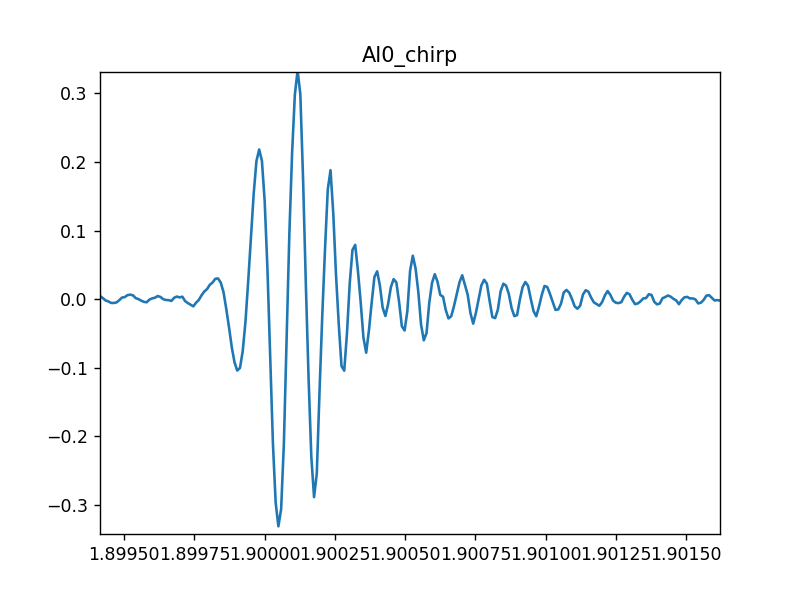

In [15]:
ball = SL(filelist_ball[0])
ball.readWavFileToArray()
ball.plot()

In [26]:
(1.9004-1.89974)

0.000660000000000105

In [25]:
0.001*102400

102.4

total sound generated: 189


<IPython.core.display.Javascript object>


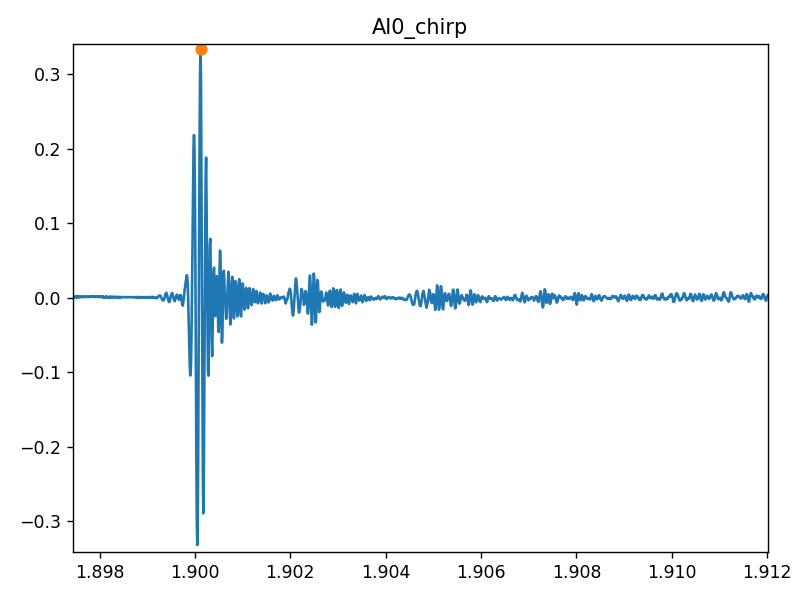

In [17]:
ball.findPeakIndex(0.25)
ball.plotWithPeak()
# b.calculateSL()

In [19]:
index_ball = ball.getIndex()
len(index_ball)/1

189.0

In [20]:
189*3

567

In [21]:
data_ball = ball.getData()
# data_tank = tank.getData()

In [35]:
fs = 102400
start_ball = int(index_ball[0]-0.0003*fs)
end_ball = int(start_ball + fs*0.0006)
# start_tank = int(index_tank[0]-0.001*fs)
# end_tank = int(start_tank + fs*0.004)

template = data_ball[start_ball:end_ball]
single = data_ball[start_ball:end_ball]
# add_tank = data_tank[start_tank:end_tank]
for i in range(1, 100):
    start_ball = int(index_ball[i]-0.0003*fs)
    end_ball = int(start_ball + fs*0.0006)
#     start_tank = int(index_tank[6*i]-0.001*fs)
#     end_tank = int(start_tank + fs*0.004)
    
    ball = data_ball[start_ball:end_ball]
#     tank = data_tank[start_tank:end_tank]
    
    template = template + ball
#     add_tank = add_tank + tank

<IPython.core.display.Javascript object>


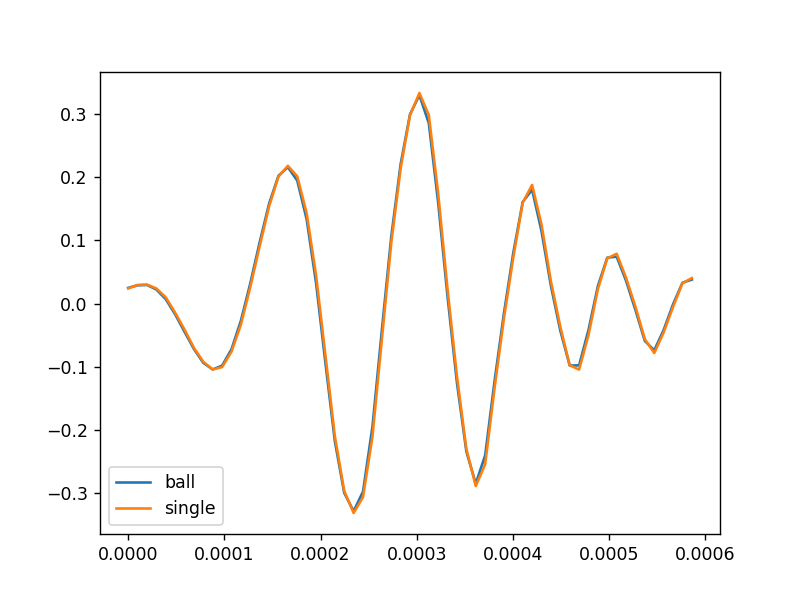

In [34]:
fig, ax = plt.subplots()
fs = 102400
time = np.arange(len(add_ball))/fs

ax.plot(time, add_ball/100, label="ball")
ax.plot(time, single, label="single")
# ax[1].plot(time_tank[time_tank_start:end_tank], data_head[time_head_start:end_head]-data_tank[time_tank_start:end_tank], label="head-tank")
ax.legend(loc=3)
# fig.tight_layout()

In [56]:
fs = 102400
start_ball = int(index_ball[0]-0.001*fs)
end_ball = int(start_ball + fs*0.01)
# start_tank = int(index_tank[0]-0.001*fs)
# end_tank = int(start_tank + fs*0.004)

first_signal = data_ball[start_ball:end_ball]

<IPython.core.display.Javascript object>


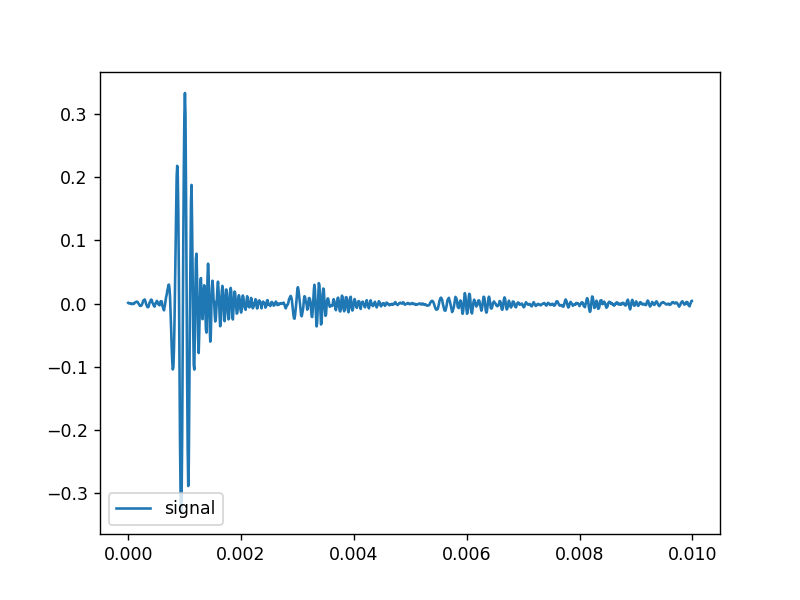

In [57]:
fig, ax = plt.subplots()
fs = 102400
time = np.arange(len(first_signal))/fs

ax.plot(time, first_signal, label="signal")
# ax[1].plot(time_tank[time_tank_start:end_tank], data_head[time_head_start:end_head]-data_tank[time_tank_start:end_tank], label="head-tank")
ax.legend(loc=3)
# fig.tight_layout()

<IPython.core.display.Javascript object>


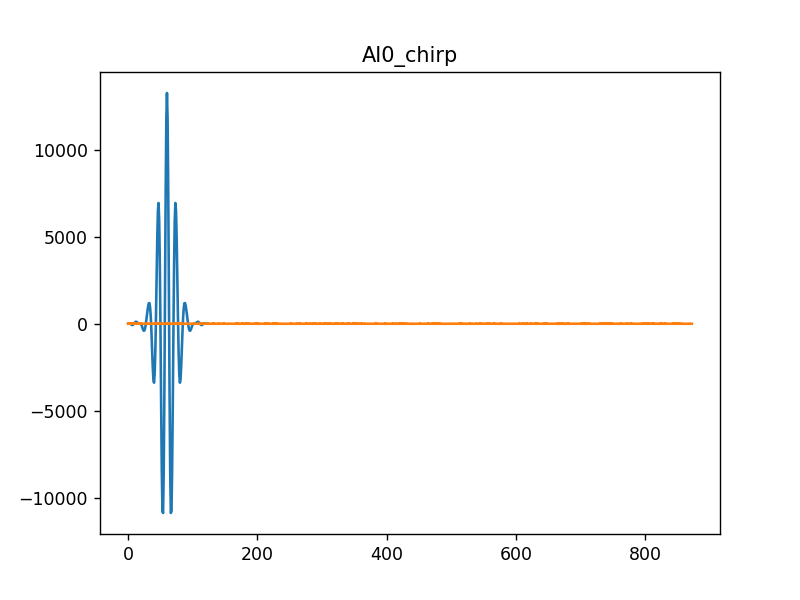

In [39]:
auto_correlation = np.correlate(fir_coeff, fir_coeff, "full")
fig, ax = plt.subplots()
ax.plot(auto_correlation)

In [41]:
(96-23)/102400

0.000712890625

<IPython.core.display.Javascript object>


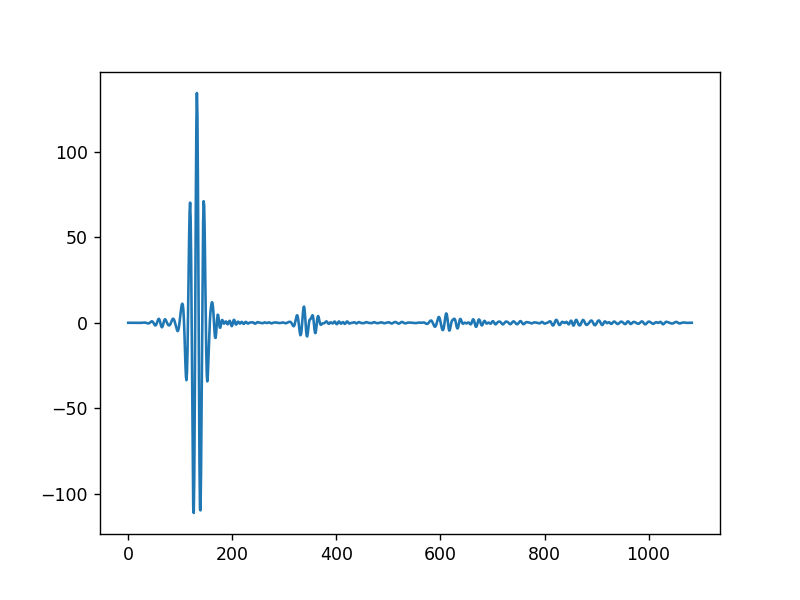

In [38]:
fir_coeff = template[::-1]
det_1 = np.convolve(fir_coeff, first_signal, "full")
fig, ax = plt.subplots()
ax.plot(det_1)

title: AI0_chirp
total lenght: 89300000, time duration: 872


<IPython.core.display.Javascript object>


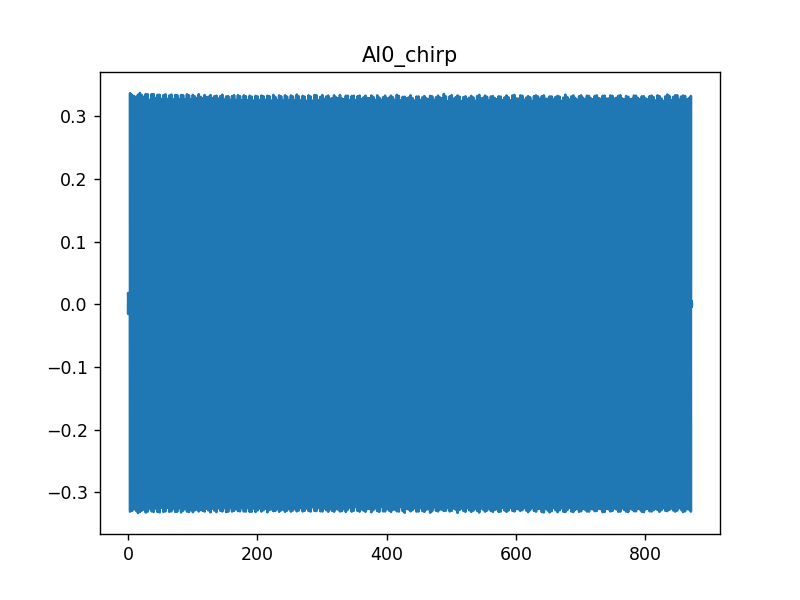

In [43]:
target = SL(filelist_ball[1])
target.readWavFileToArray()
target.plot()

total sound generated: 287


<IPython.core.display.Javascript object>


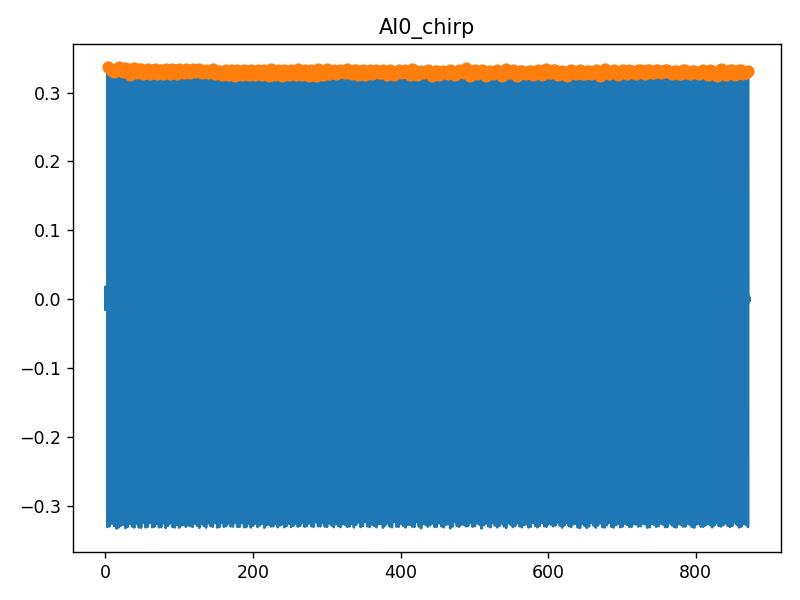

In [44]:
target.findPeakIndex(0.25)
target.plotWithPeak()
# b.calculateSL()

In [45]:
data_target = target.getData()

In [50]:
index_target = target.getIndex()
len(index_target)/1

287.0

<IPython.core.display.Javascript object>


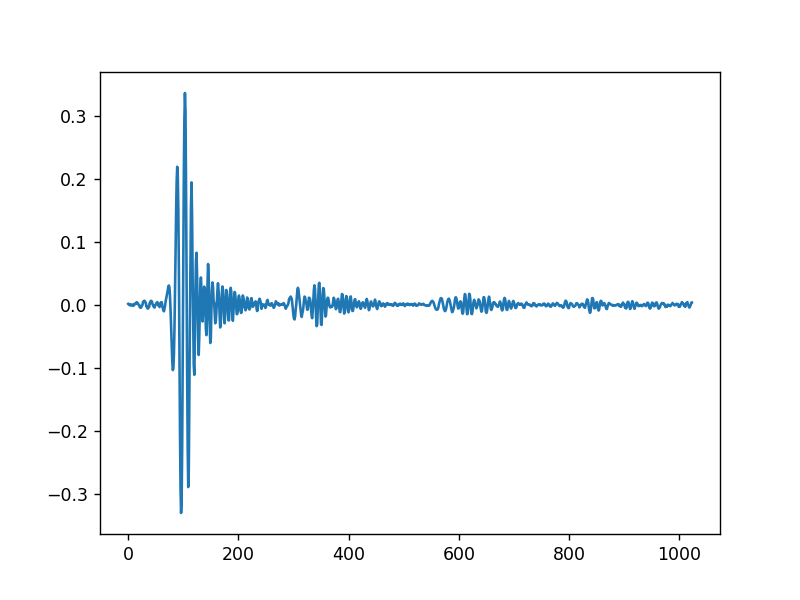

In [55]:
fs = 102400
start_target = int(index_target[0]-0.001*fs)
end_target = int(start_target + fs*0.01)
# start_tank = int(index_tank[0]-0.001*fs)
# end_tank = int(start_tank + fs*0.004)

first_signal_target = data_target[start_target:end_target]
fig, ax = plt.subplots()
ax.plot(first_signal_target)

<IPython.core.display.Javascript object>


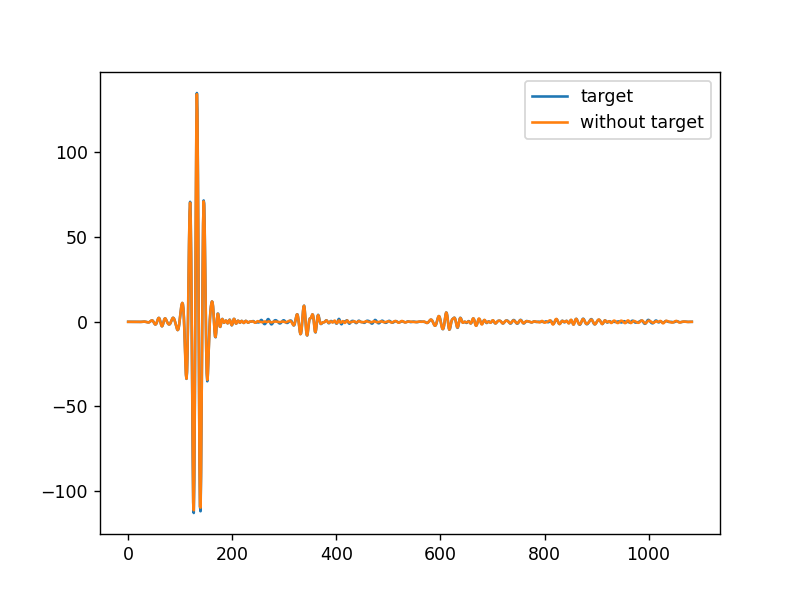

In [61]:
fir_coeff = template[::-1]
det_2 = np.convolve(fir_coeff, first_signal_target, "full")
det_1 = np.convolve(fir_coeff, first_signal, "full")
fig, ax = plt.subplots()
ax.plot(det_2, label="target")
ax.plot(det_1, label="without target")
ax.legend()

<IPython.core.display.Javascript object>


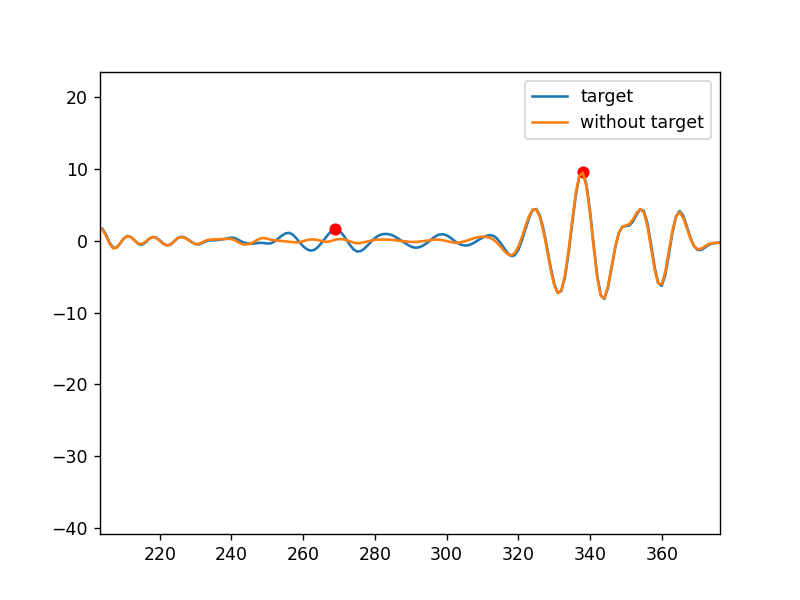

In [74]:
sig_1 = det_2[:240]
sig_2 = det_2[240:310]
sig_3 = det_2[310:380]
arg_1 = np.argmax(sig_1)
arg_2 = np.argmax(sig_2)+240
arg_3 = np.argmax(sig_3)+310

fig, ax = plt.subplots()
ax.plot(det_2, label="target")
ax.plot(arg_2, det_2[arg_2],'ro')
ax.plot(arg_1, det_2[arg_1],'ro')
ax.plot(arg_3, det_2[arg_3],'ro')
ax.plot(det_1, label="without target")
ax.legend()

In [64]:
(arg_2-arg_1)/102400

0.00048828125

In [65]:
2/1500

0.0013333333333333333